In [9]:
import requests
from datetime import datetime, timedelta

sources = ['HARBINGER','COINBASE']
colors = ['red', 'orange']
limits = [10, 60]

timestamps = {}
prices = {}

for source in sources:
    timestamps[source] = []
    prices[source] = []

candles = requests.get('http://127.0.0.1:44000/api/rest/candles').json()
candles = sorted(candles['juster_candle'], key=lambda c: c['until'])
candles = [{**c, 'until': datetime.fromisoformat(c['until'][:19])} for c in candles]

for c in candles:
    source = c['source']

    if source == 'KOLIBRI':
        c['timestamp'] -= timedelta(minutes=3)
    
    timestamps[source].append(c['until'])
    prices[source].append(c['close'])

for source in sources:
    source_timestamps = timestamps[source]
    print(f'{source}: {len(source_timestamps)}, last {source_timestamps[-1]}')

HARBINGER: 1076, last 2021-07-21 14:01:00
COINBASE: 22422, last 2021-07-21 14:09:00


In [10]:
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.style.use('dark_background')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 48

mpl.rc('font', size=BIGGER_SIZE)          # controls default text sizes
mpl.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
mpl.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
mpl.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
mpl.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
mpl.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
mpl.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

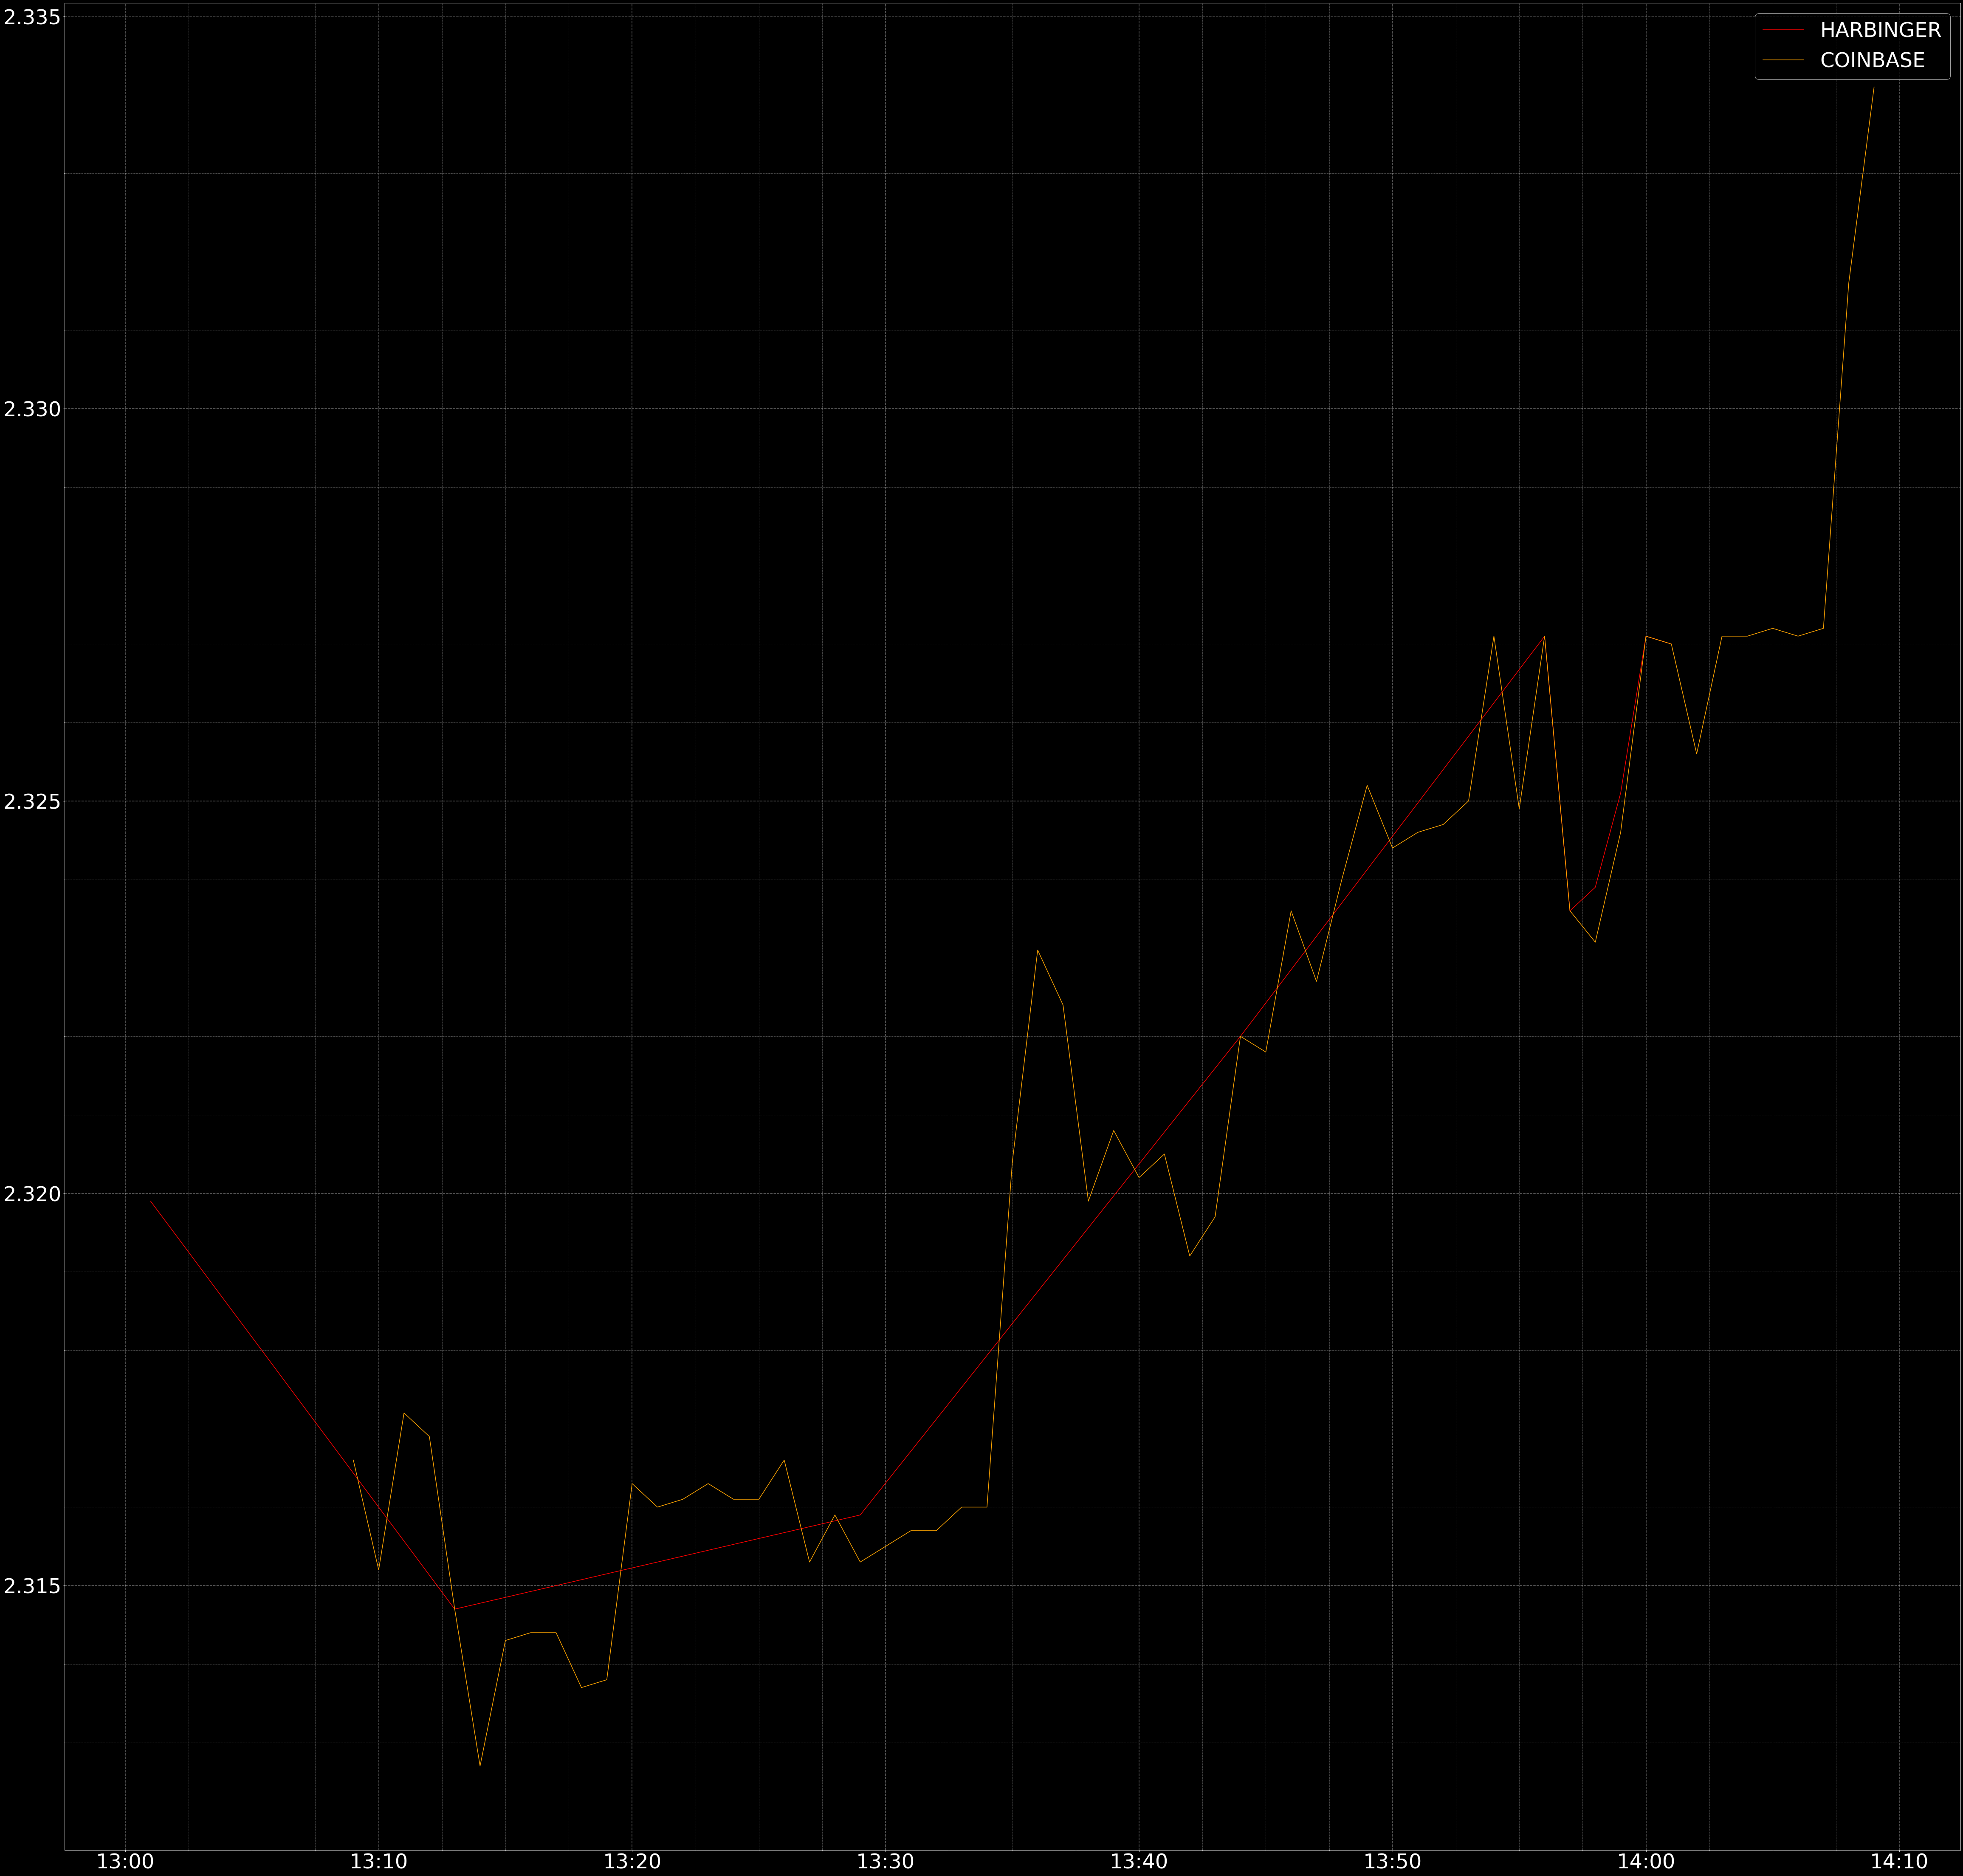

In [11]:
figure, ax = plt.subplots(figsize=(80,80))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.plot()

for source, color, limit in zip(sources, colors, limits):    
    plt.plot(timestamps[source][-limit:], prices[source][-limit:], c=color, label=source)

plt.minorticks_on()
plt.grid(linewidth=1.5, color='#ffffff', linestyle='--', alpha=0.4, which='major')
plt.grid(linewidth=0.7, color='#ffffff', linestyle='--', alpha=0.4, which='minor')
plt.legend()
plt.show()

NameError: name 'axis' is not defined

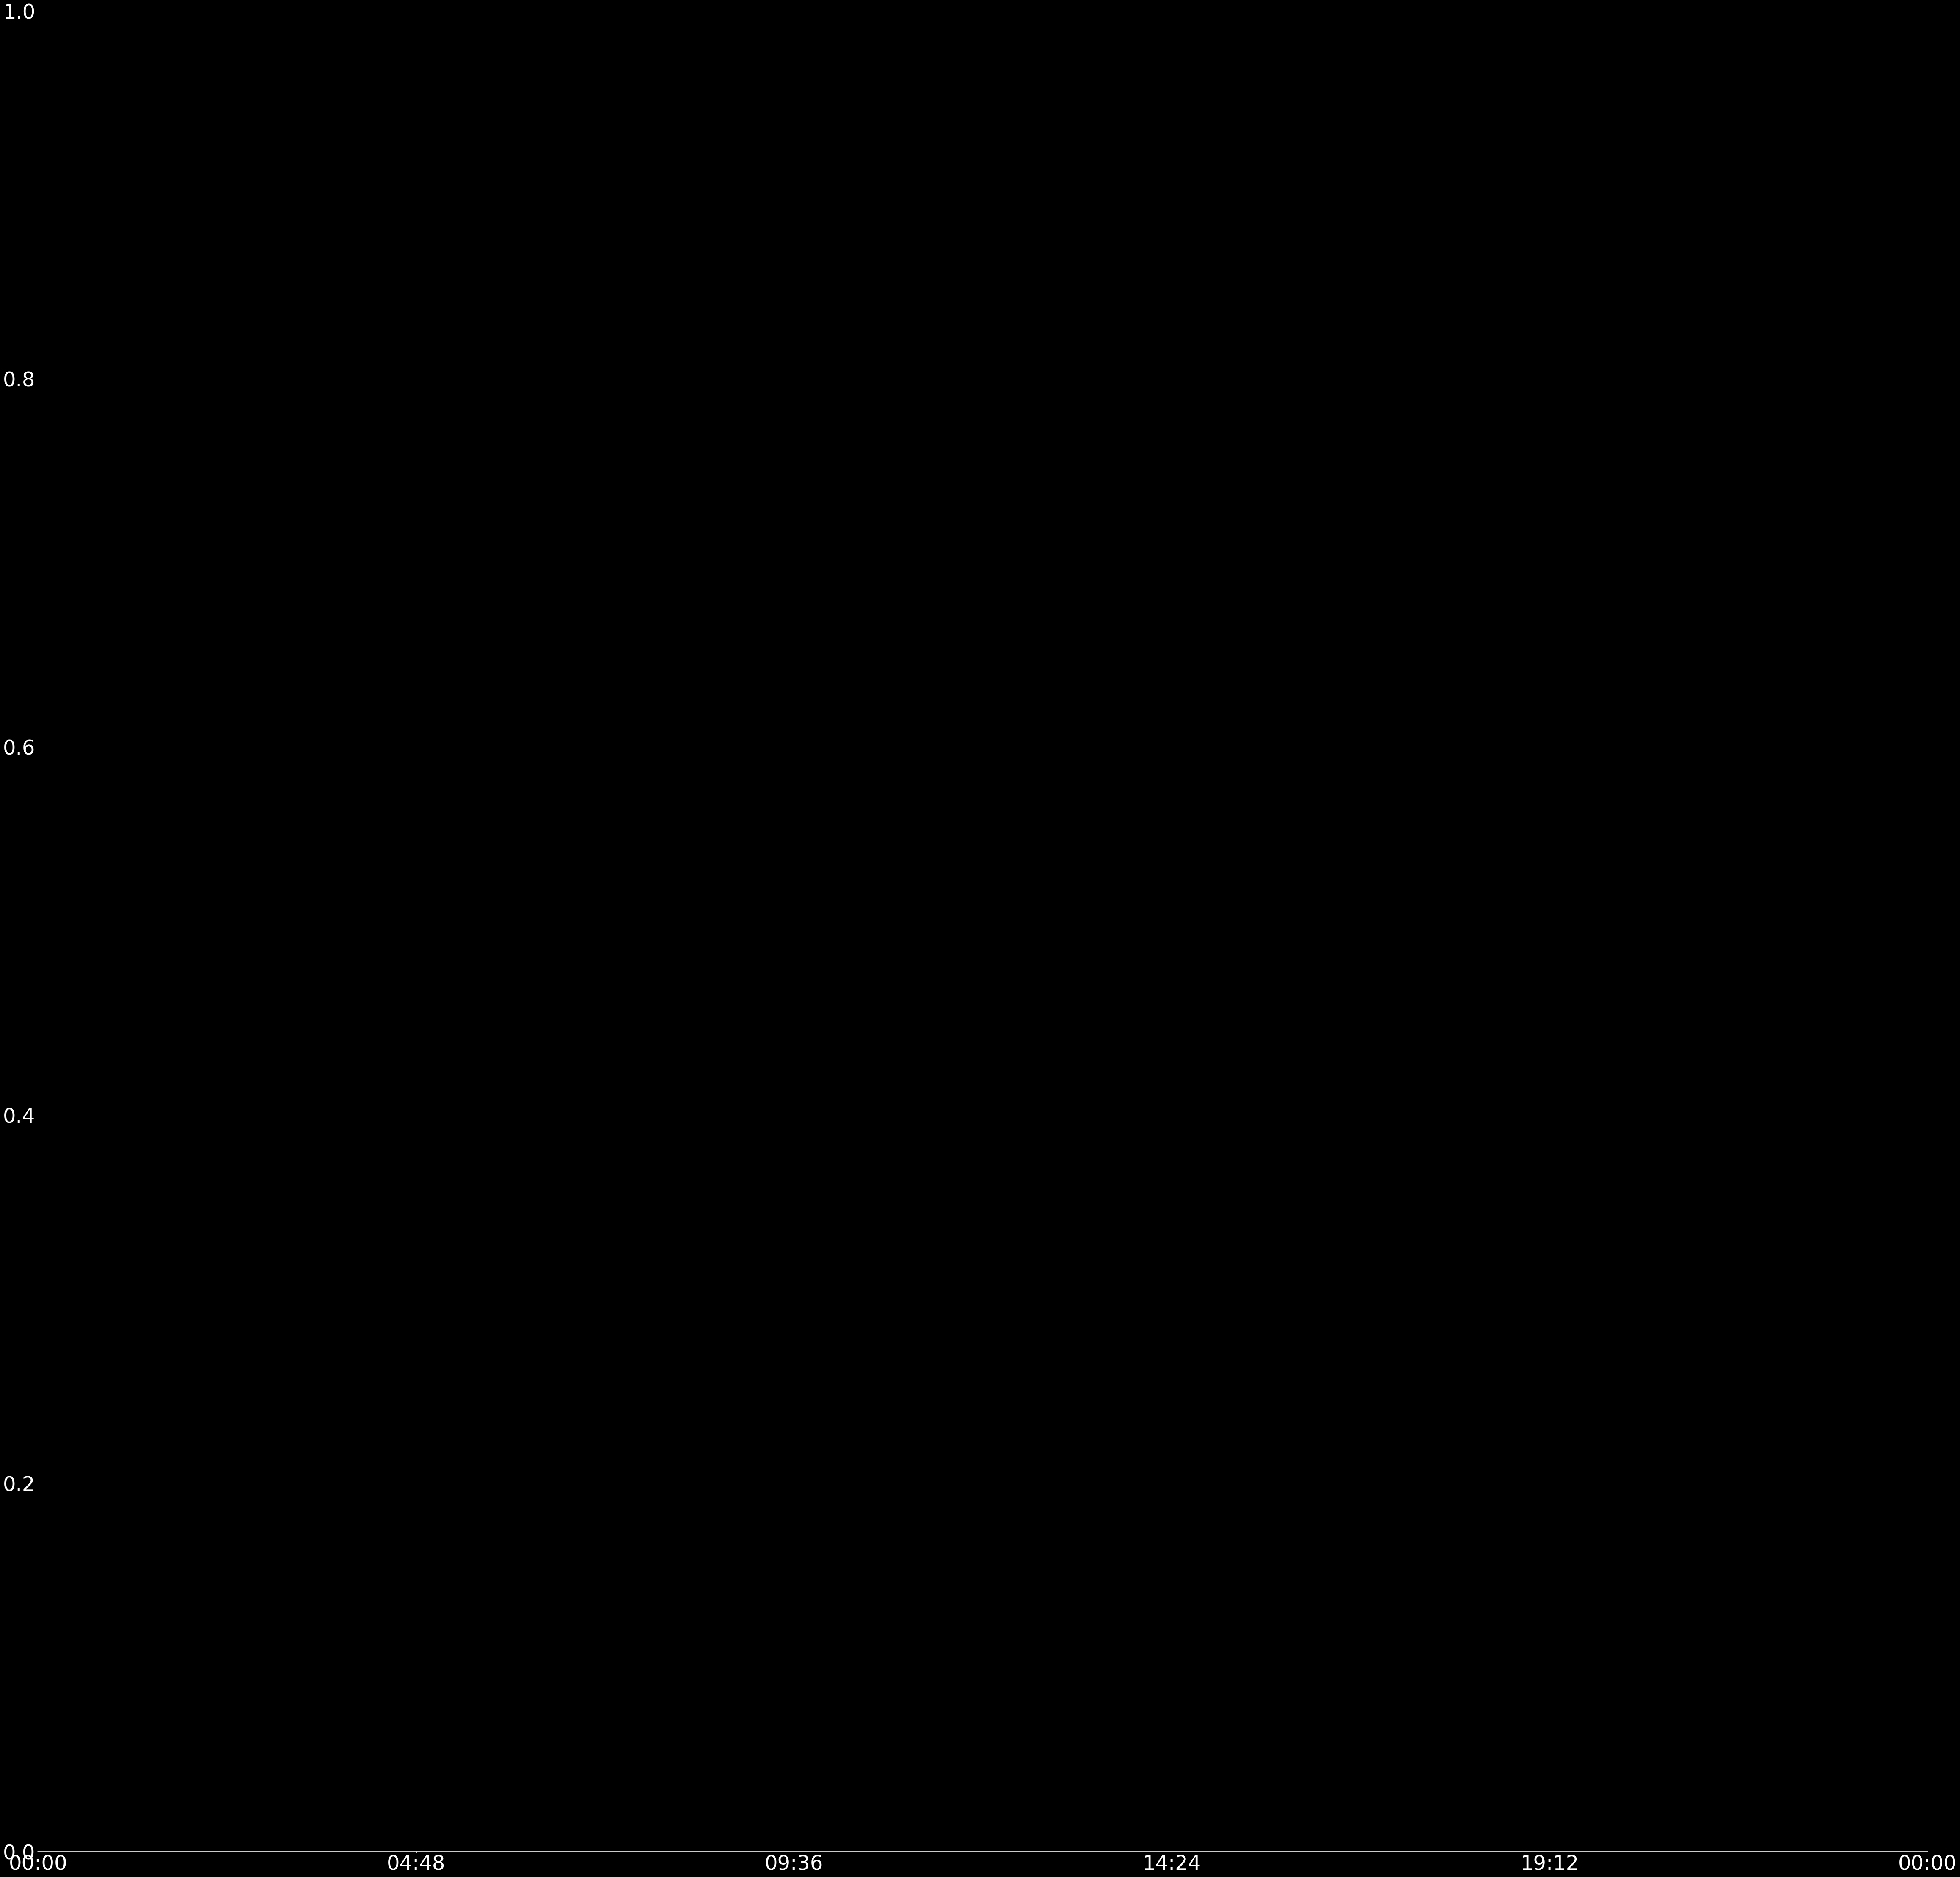

In [8]:
figure, ax = plt.subplots(figsize=(80,80))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axis.plot()

for source, color, limit in zip(sources, colors, limits):
    if source not in ('HARBINGER', 'HARBINGER_RAW'):
        continue
    
    plt.plot(timestamps[source][-limit:], prices[source][-limit:], c=color, label=source)

plt.minorticks_on()
plt.grid(linewidth=1.5, color='#ffffff', linestyle='--', alpha=0.4, which='major')
plt.grid(linewidth=0.7, color='#ffffff', linestyle='--', alpha=0.4, which='minor')
plt.legend()
plt.show()